### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


### Creating Functions

Creating several needed functions for the study : 
- get_stock_rates in order import stock exchange rates for a given company
- plotting functions to create linear plot of the stock price evolution 
- stock prediction functions

In [3]:
# def get_stock_rates(company_name):
#     """get the stock exchange rate for the given company from Yahoo! Finance for the studied period  
#     i.e. from 2010-01-01 to 2020-03-08
    
#     Input : the official company name, as quoted on the Stock Exchange 
#     Output : DataFrame of the given company's stock exchange price evolution with finance KPIs : 
#             Highest price, Lowest price, Opening Price, Closing Price, Volume of stocks 
#             + new column 'avg_price' i.e. average of the Highest & Lowest price of the day"""
    
#     df = web.DataReader(f'{company_name}', data_source='yahoo', start='2010-01-01', end='2020-03-08')
#     df['avg_price'] = df[['High','Low']].mean(axis=1)
#     df.to_csv(f'{company_name}_stocks_rate_2010-01-01_to_2020-03-08.csv')
#     df.head()
    
#     return df

## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [4]:
df_TSLA = pd.read_csv('../DataSets/Stocks_raw_data/TSLA_stocks_rate_2010-01-01_to_2020-03-08.csv', index_col='Date')

In [5]:
df_TSLA['PCT_change'] = df_TSLA['Adj Close'].pct_change(fill_method='ffill')

In [6]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


Adding PCT_change i.e. percetange change evolution from one day to another to measure the general trend of each day

In [7]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


In [8]:
df_TSLA.dtypes

High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Adj Close     float64
avg_price     float64
PCT_change    float64
dtype: object

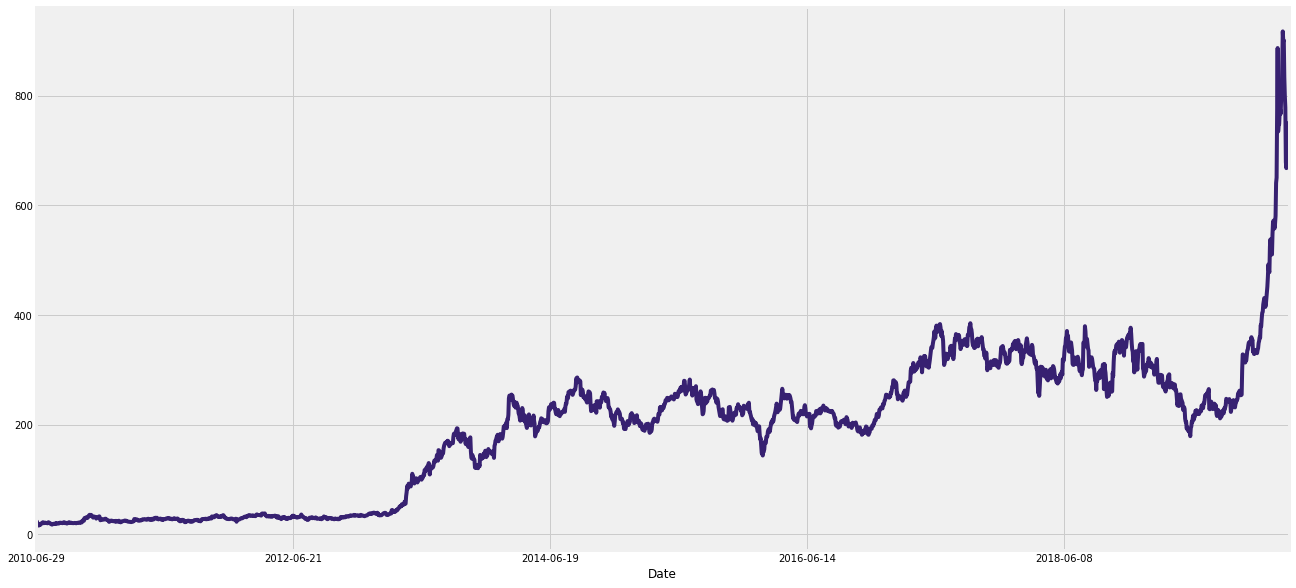

In [9]:
df_TSLA['Adj Close'].plot(figsize=(20,10), c=np.random.rand(3))

## 1 - Comparison of Car sales VS. Stock Price

### Importing Tesla Car Sales Dataframe to measure its impact

In [10]:
tesla_car_sales = pd.read_csv('../DataSets/Tesla_car_sales/tesla_total_sales_2008_2019.csv')

In [11]:
# #Adding Month name to be able to plot it versus Stock quarter
# condlist = [tesla_car_sales['Quarter'] ==1, tesla_car_sales['Quarter'] ==2, tesla_car_sales['Quarter'] ==3, tesla_car_sales['Quarter'] ==4]
# choicelist = ["January", "April", "July", "October"]
# tesla_car_sales['Month'] = np.select(condlist, choicelist)

In [12]:
#adding fusioned year quarter
tesla_car_sales['Year_Q'] = tesla_car_sales["Year"].astype(str) + ' Q'+ tesla_car_sales["Quarter"].astype(str)

In [13]:
tesla_car_sales

,Year,Quarter,Model 3 sales,Luxury Models sold,Year_Q
0,2008,2,0,3,2008 Q2
1,2008,3,0,27,2008 Q3
2,2008,4,0,70,2008 Q4
3,2009,1,0,220,2009 Q1
4,2009,2,0,180,2009 Q2
5,2009,3,0,200,2009 Q3
6,2009,4,0,300,2009 Q4
7,2010,1,0,100,2010 Q1
8,2010,2,0,100,2010 Q2
9,2010,3,0,100,2010 Q3


In [14]:
tesla_car_sales.dtypes

Year                   int64
Quarter                int64
Model 3 sales          int64
Luxury Models sold     int64
Year_Q                object
dtype: object

In [15]:
plt.hist(x=tesla_car_sales['Year_Q'], y=tesla_car_sales['Luxury Models sold'])

(array([5., 5., 4., 5., 4., 5., 5., 4., 5., 5.]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ]),
 <a list of 10 Patch objects>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024B6D0E71E0> (for post_execute):


ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

<Figure size 432x288 with 1 Axes>

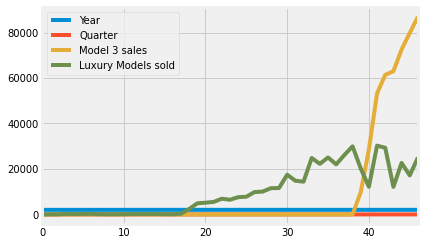

In [16]:
tesla_car_sales.plot()

#### Creating a Quarter based Medium Stock Price

Importing the TSLA Stock DF, reseting the index to a datebase index & using it to sample on a Quarter basis

In [17]:
df_TSLA_quarter = df_TSLA.copy()

In [18]:
df_TSLA_quarter.reset_index(inplace=True)

In [19]:
df_TSLA_quarter['Date'] = pd.to_datetime(df_TSLA_quarter['Date'])

In [20]:
df_TSLA_quarter.set_index(df_TSLA_quarter['Date'],inplace=True)

In [21]:
df_TSLA_quarter = df_TSLA_quarter['Adj Close'].resample('Q').mean()

In [22]:
df_TSLA_quarter.columns=['Quarter', 'Stock_Mean_Price']

In [23]:
df_TSLA_quarter

Date
2010-06-30     23.860000
2010-09-30     19.929844
2010-12-31     26.737656
2011-03-31     24.217742
2011-06-30     27.248254
2011-09-30     25.873906
2011-12-31     29.852857
2012-03-31     31.940968
2012-06-30     31.587460
2012-09-30     29.788730
2012-12-31     31.372742
2013-03-31     36.496333
2013-06-30     75.274531
2013-09-30    148.403280
2013-12-31    153.186718
2014-03-31    200.911639
2014-06-30    209.206825
2014-09-30    247.529376
2014-12-31    234.397032
2015-03-31    202.486886
2015-06-30    237.179207
2015-09-30    254.871563
2015-12-31    224.453751
2016-03-31    197.300328
2016-06-30    227.279844
2016-09-30    216.575780
2016-12-31    197.131269
2017-03-31    253.782582
2017-06-30    330.184445
2017-09-30    346.085237
2017-12-31    326.252064
2018-03-31    329.929018
2018-06-30    304.837344
2018-09-30    312.416032
2018-12-31    322.655873
2019-03-31    301.116720
2019-06-30    233.457778
2019-09-30    234.842187
2019-12-31    325.371095
2020-03-31    664.88

Data Wrangling : creating new dating system based on Quarter (format YYYY-MM-DD) to be able to compare Quarterly car sales with the stock sampling made by Pandas .resample('Q').mean()

In [24]:
tesla_car_sales = pd.read_csv('../DataSets/Tesla_car_sales/tesla_total_sales_2008_2019.csv')

In [25]:
#Adding Month name to be able to plot it versus Stock quarter
condlist = [tesla_car_sales['Quarter'] ==1, tesla_car_sales['Quarter'] ==2, tesla_car_sales['Quarter'] ==3, tesla_car_sales['Quarter'] ==4]
choicelist = ["-03-31", "-06-30", "-09-30", "-12-31"]
tesla_car_sales['period'] = np.select(condlist, choicelist)

string edition & formation to be able to create a new "Date" column on a datetime format to be able to merge it with Quarter Stock sample

In [26]:
tesla_car_sales['Year'] = tesla_car_sales['Year'].astype(str)

tesla_car_sales['Date'] = tesla_car_sales['Year'] + tesla_car_sales['period']

tesla_car_sales['Date'] = pd.to_datetime(tesla_car_sales['Date'])

tesla_car_sales.drop(columns='period', inplace=True)

tesla_car_sales = tesla_car_sales[['Date', 'Year','Quarter','Model 3 sales','Luxury Models sold']]

In [27]:
tesla_car_sales

,Date,Year,Quarter,Model 3 sales,Luxury Models sold
0,2008-06-30,2008,2,0,3
1,2008-09-30,2008,3,0,27
2,2008-12-31,2008,4,0,70
3,2009-03-31,2009,1,0,220
4,2009-06-30,2009,2,0,180
5,2009-09-30,2009,3,0,200
6,2009-12-31,2009,4,0,300
7,2010-03-31,2010,1,0,100
8,2010-06-30,2010,2,0,100
9,2010-09-30,2010,3,0,100


In [28]:
tesla_car_sales.dtypes

Date                  datetime64[ns]
Year                          object
Quarter                        int64
Model 3 sales                  int64
Luxury Models sold             int64
dtype: object

Merging both dataframes into one featuring Mean Adj Close Price & the Amount of Car Sales 

In [29]:
dfmerged_stock_quarter_car = pd.merge(df_TSLA_quarter, tesla_car_sales, how='left', on='Date')

In [30]:
dfmerged_stock_quarter_car

,Date,Adj Close,Year,Quarter,Model 3 sales,Luxury Models sold
0,2010-06-30,23.860000,2010,2.0,0.0,100.0
1,2010-09-30,19.929844,2010,3.0,0.0,100.0
2,2010-12-31,26.737656,2010,4.0,0.0,100.0
3,2011-03-31,24.217742,2011,1.0,0.0,198.0
4,2011-06-30,27.248254,2011,2.0,0.0,198.0
5,2011-09-30,25.873906,2011,3.0,0.0,198.0
6,2011-12-31,29.852857,2011,4.0,0.0,200.0
7,2012-03-31,31.940968,2012,1.0,0.0,99.0
8,2012-06-30,31.587460,2012,2.0,0.0,89.0
9,2012-09-30,29.788730,2012,3.0,0.0,321.0


In [31]:
mergetest = dfmerged_stock_quarter_car

In [32]:
mergetest = dfmerged_stock_quarter_car[['Date','Adj Close','Model 3 sales','Luxury Models sold']]

In [33]:
mergetest['Date'] = pd.to_datetime(mergetest['Date'])
mergetest['Date'] = mergetest['Date'].dt.date

C:\Users\langl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\langl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
mergetest.dtypes

Date                   object
Adj Close             float64
Model 3 sales         float64
Luxury Models sold    float64
dtype: object

### Ploting Stock price evolution VS. Car sales

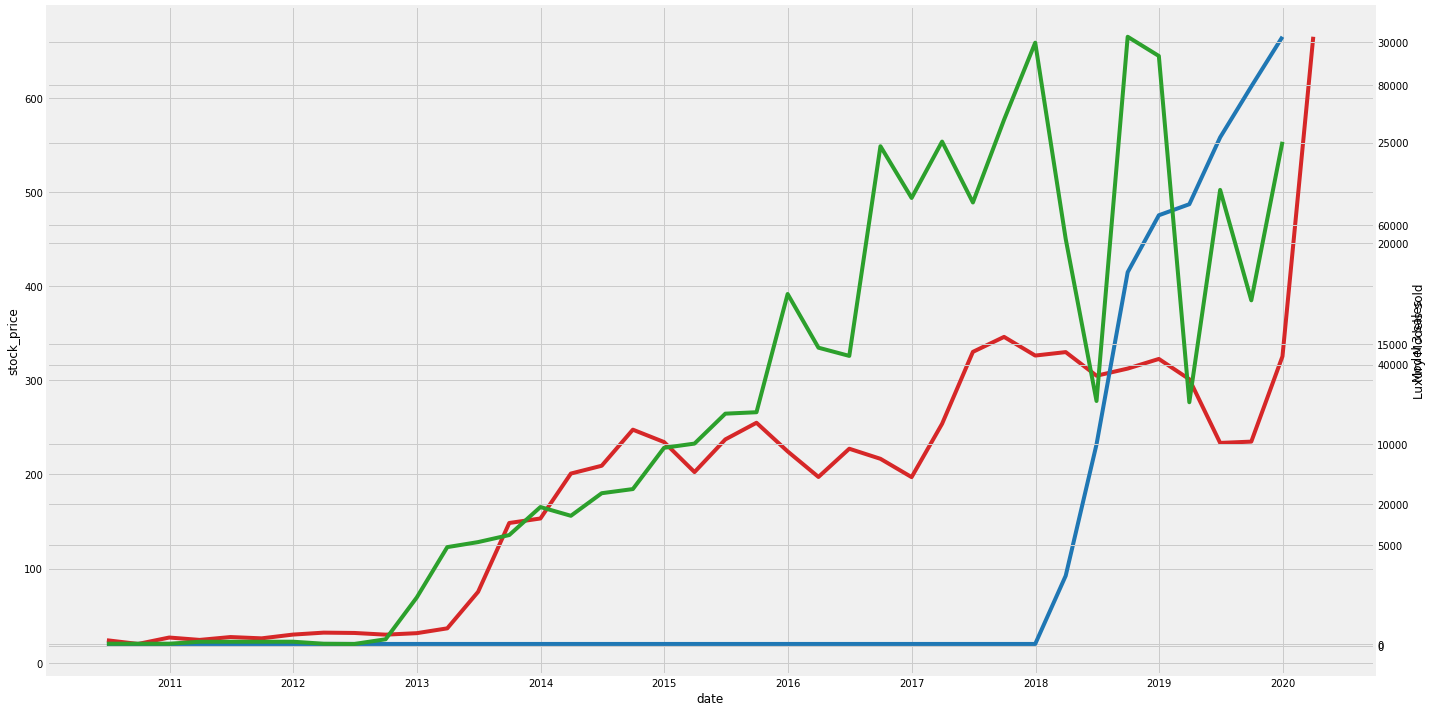

In [37]:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('stock_price', color=color)
ax1.plot(mergetest['Date'], mergetest['Adj Close'], color=color1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Model 3 sales', color=color)  # we already handled the x-label with ax1
ax2.plot(mergetest['Date'], mergetest['Model 3 sales'], color=color2)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()

color3 = 'tab:green'
ax3.set_ylabel('Luxury Models sold', color=color)  # we already handled the x-label with ax1
ax3.plot(mergetest['Date'], mergetest['Luxury Models sold'], color=color3)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Bar Ploting 

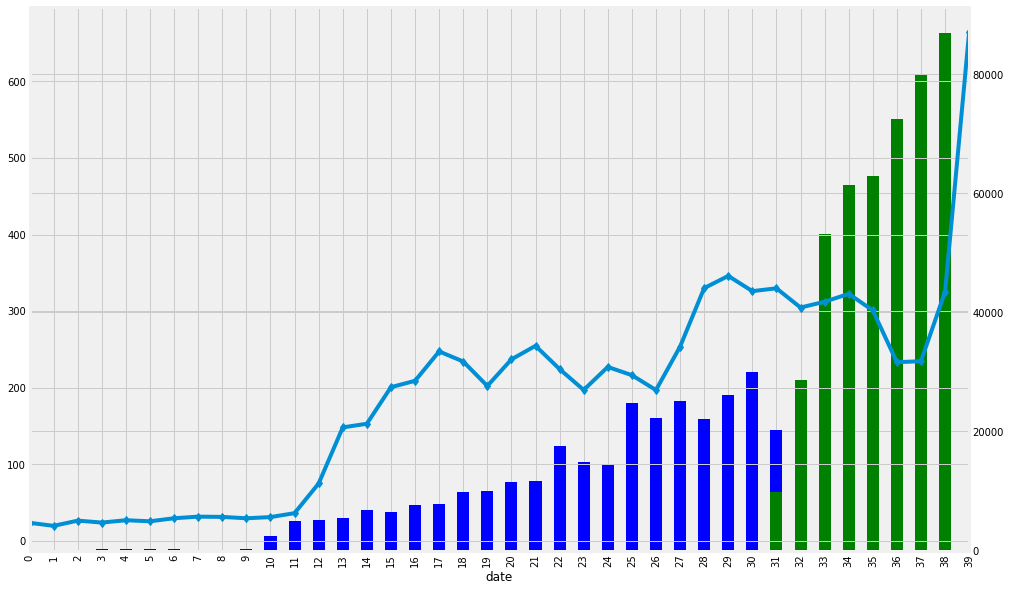

In [38]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('date')
ax2 = ax1.twinx()
mergetest['Luxury Models sold'].plot(kind='bar', color='b', ax=ax1)
mergetest['Model 3 sales'].plot(kind='bar', color='g', ax=ax1)
mergetest['Adj Close'].plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

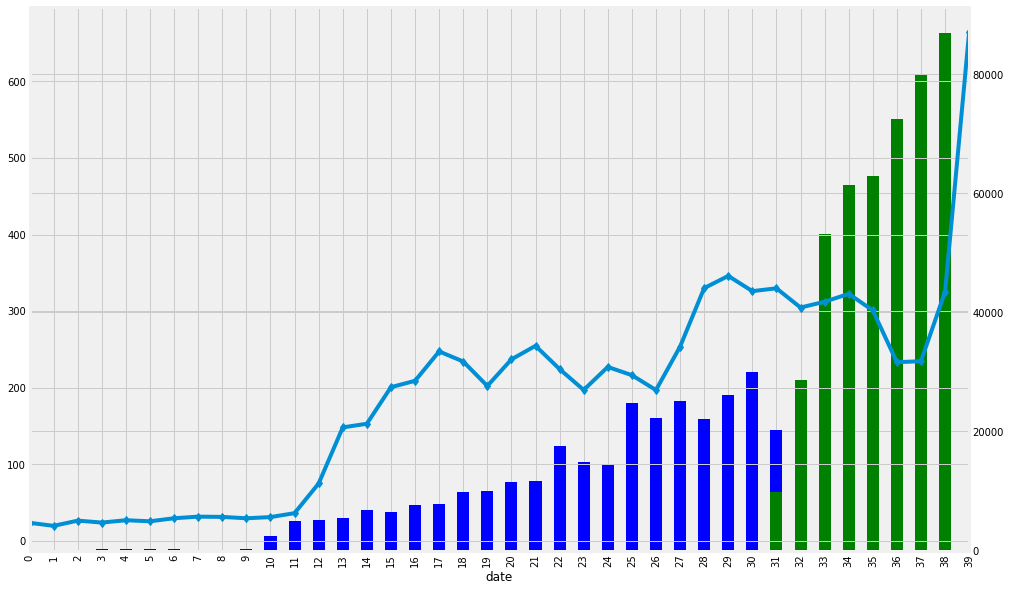

In [39]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('date')
ax2 = ax1.twinx()
mergetest['Luxury Models sold'].plot(x='Date',kind='bar', color='b', ax=ax1)
mergetest['Model 3 sales'].plot(x='Date', kind='bar', color='g', ax=ax1)
mergetest['Adj Close'].plot(x='Date', kind='line', marker='d', ax=ax2, stacked=True)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

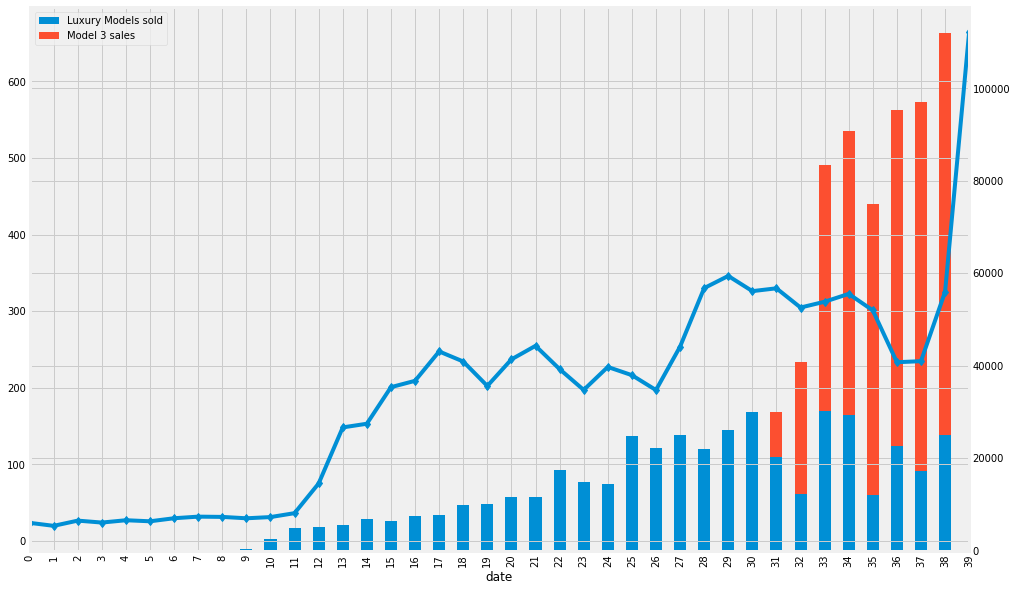

In [40]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('date')
ax2 = ax1.twinx()
mergetest[['Luxury Models sold', 'Model 3 sales']].plot(kind='bar', ax=ax1,stacked=True)
# mergetest['Model 3 sales'].plot(x='Date', kind='bar', color='g', ax=ax1,stacked=True)
mergetest['Adj Close'].plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

In [41]:
# mergetest.set_index('Date', inplace=True)
mergetest.reset_index(drop=False, inplace=True)

In [42]:
dfmerged_stock_quarter_car.dtypes

Date                  datetime64[ns]
Adj Close                    float64
Year                          object
Quarter                      float64
Model 3 sales                float64
Luxury Models sold           float64
dtype: object

MinMax Scaler

MinMaxScalerCar = preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
# Car_to_scale = MinMaxScalerCar.fit_transform(dfmerged_stock_quarter_car)